In [13]:
import numpy  as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Quitar cuando se trabaje en un proyecto real
import warnings
warnings.filterwarnings('ignore')

In [14]:
preprocess_train = pd.read_csv('./prepoces_day_train.csv', sep=';', decimal='.')
preprocess_test = pd.read_csv('./preproces_day_test.csv', sep=';', decimal='.')

In [15]:
# Train
data_train = preprocess_train.values
y_train = data_train[:, 0:1].ravel()  # nos quedamos con la 1ª columna, price
X_train = data_train[:, 1:]  # nos quedamos con el resto

# Test
data_test = preprocess_test.values
y_test = data_test[:,0:1].ravel()     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

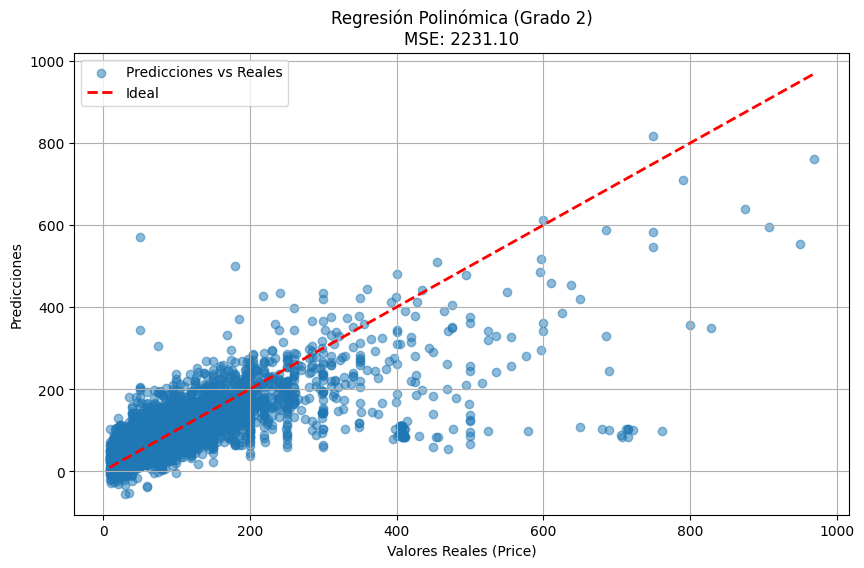

Intercepto: -302.2173316328162

||w||_2^2 = 7.5e+04

MSE train: 2231.10
RMSE train : 47.2


In [22]:
# Grado del polinomio
degree = 2

# Generar características polinómicas para el entrenamiento
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)

# Crear y ajustar modelo de regresión lineal con características polinómicas
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# Predicciones en el conjunto de entrenamiento
y_pred_train_poly = lr.predict(X_train_poly)

# Calcular el error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_pred_train_poly)


# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_poly, alpha=0.5, label="Predicciones vs Reales")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label="Ideal")
plt.title(f"Regresión Polinómica (Grado {degree})\nMSE: {mse_train:.2f}")
plt.xlabel("Valores Reales (Price)")
plt.ylabel("Predicciones")
plt.legend()
plt.grid()
plt.show()

# Mostrar coeficientes del modelo
print(f"Intercepto: {lr.intercept_}")
#print("Coeficientes:")
w = lr2.coef_
alfa = np.dot(w[1:], w[1:])  # Excluyendo el intercepto

#coef_names = [f'w{i}: ' for i in range(1, len(w))]
#for name, wi in zip(coef_names, w[1:]):
    #print(name, wi)

print(f'\n||w||_2^2 = {alfa:.2g}')
print(f'\nMSE train: {mse_train:.2f}')
print('RMSE train : %0.3g' % np.sqrt(mse_train))

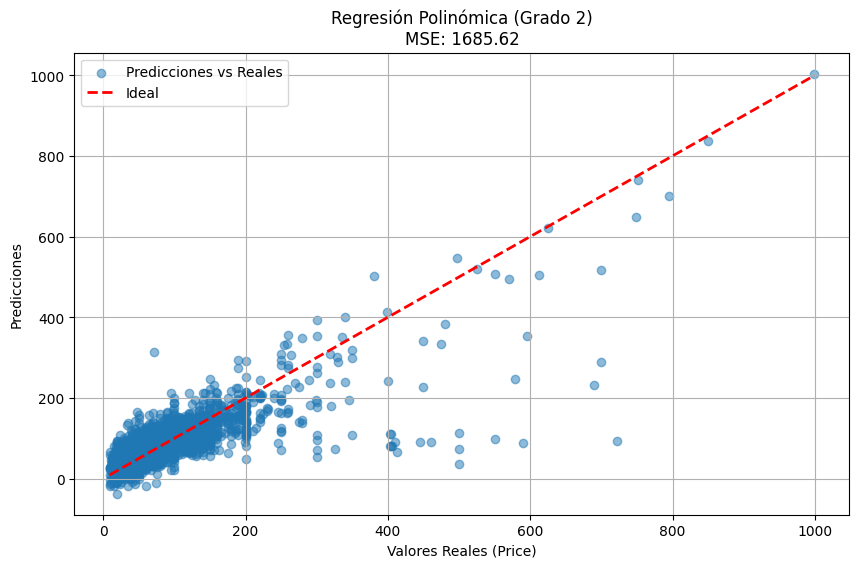

Intercepto: 1326.8405791766454

||w||_2^2 = 7.5e+04

MSE test: 1685.62
RMSE Modelo Lasso (test) : 41.1


In [21]:
# Grado del polinomio
degree = 2

# Generar características polinómicas para el entrenamiento
poly = PolynomialFeatures(degree)
X_test_poly = poly.fit_transform(X_test)

# Crear y ajustar modelo de regresión lineal con características polinómicas
lr2 = LinearRegression()
lr2.fit(X_test_poly, y_test)

# Predicciones en el conjunto de entrenamiento
y_pred_test_poly = lr2.predict(X_test_poly)

# Calcular el error cuadrático medio (MSE)
mse_test = mean_squared_error(y_test, y_pred_test_poly)

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_poly, alpha=0.5, label="Predicciones vs Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.title(f"Regresión Polinómica (Grado {degree})\nMSE: {mse_test:.2f}")
plt.xlabel("Valores Reales (Price)")
plt.ylabel("Predicciones")
plt.legend()
plt.grid()
plt.show()

# Mostrar coeficientes del modelo
print(f"Intercepto: {lr2.intercept_}")
#print("Coeficientes:")
w = lr2.coef_
alfa = np.dot(w[1:], w[1:])  # Excluyendo el intercepto

#coef_names = [f'w{i}: ' for i in range(1, len(w))]
#for name, wi in zip(coef_names, w[1:]):
    #print(name, wi)

print(f'\n||w||_2^2 = {alfa:.2g}')
print(f'\nMSE Modelo Lasso (test): {mse_test:.2f}')
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mse_test))
